In [32]:
import pyBigWig
import matplotlib.pyplot as plt
import numpy as np

In [8]:
import os
print(os.getcwd())

/Users/sebastian/University/Master/mt/ews-ml/src/corigami/preprocessing


In [12]:
PATH_TREAT = "/Users/sebastian/University/Master/mt/ews-ml/src/corigami/preprocessing/data/genomic_features_data/GSE108869_Control_CTCF_ChIPSeq_treat.bw"
PATH_CONTROL = "/Users/sebastian/University/Master/mt/ews-ml/src/corigami/preprocessing/data/genomic_features_data/GSE108869_Control_CTCF_ChIPSeq_control.bw"
PATH_NORM = "/Users/sebastian/University/Master/mt/ews-ml/src/corigami/preprocessing/data/genomic_features_data/normalized_ratio_50binSize.bw"

In [38]:
def show_normalization(chrom, start, end, log_scale=True):
    bw_treat = pyBigWig.open(PATH_TREAT)
    bw_control = pyBigWig.open(PATH_CONTROL)
    bw_norm = pyBigWig.open(PATH_NORM)
    
    treat_values = bw_treat.values(chrom, start, end)
    control_values = bw_control.values(chrom, start, end)
    norm_values = bw_norm.values(chrom, start, end)
    
    plt.figure(figsize=(10, 6))
    x_axis = range(start, end)
    plt.plot(x_axis, treat_values, label="Treat")
    plt.plot(x_axis, control_values, label="Control")
    plt.plot(x_axis, norm_values, label="Normalized Signal")
    plt.xlabel("Genomic Coordinates")
    plt.ylabel("Coverage")
    plt.title("Normalization using bin-size 50")

    if log_scale:
        plt.yscale('log')
        
    plt.legend()
    plt.show()
    
    bw_treat.close()
    bw_control.close()
    bw_norm.close()

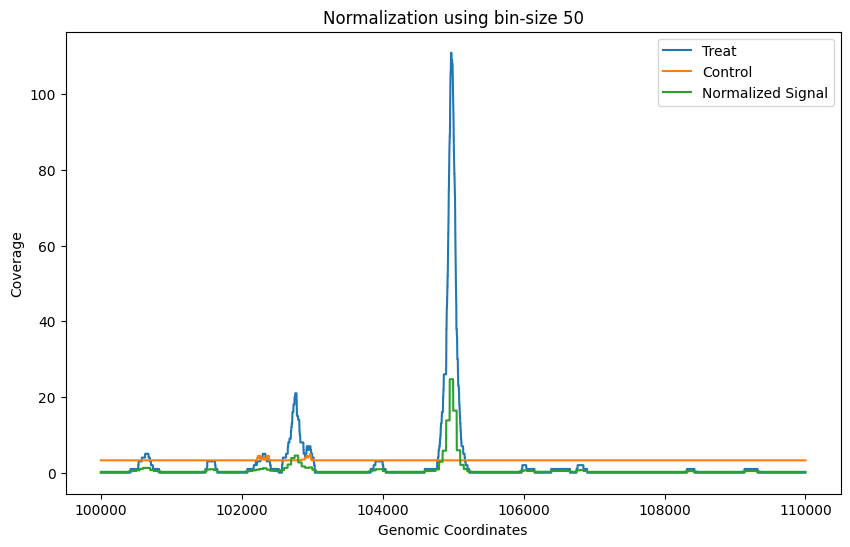

In [39]:
show_normalization("chr1", 100000, 110000, False)

In [29]:
bw_control = pyBigWig.open(PATH_CONTROL)
control_values = bw_control.values("chr1", 100000, 110000)

In [33]:
np.array(control_values).max(), np.array(control_values).min(), np.array(control_values).mean()

(np.float64(4.964069843292236),
 np.float64(3.2761800289154053),
 np.float64(3.298164363527298))